In [2]:
import pandas as pd
import numpy as np 

df = pd.read_csv('reviews.csv')

In [3]:
df

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu
...,...,...,...,...,...,...
1095,Miss Pizza,Salih Gursoy,There are so many types of pizza; you are surp...,dataset/taste/miss_pizza_salih_gursoy.png,5,taste
1096,Miss Pizza,Kemal Amangeldi,I tried the smoked ribeye pizza; the dough is ...,dataset/indoor_atmosphere/miss_pizza_kemal_ama...,5,indoor_atmosphere
1097,Miss Pizza,Ulkem Esen,Crowded and expensive place.,dataset/menu/miss_pizza_ulkem_esen.png,3,menu
1098,Miss Pizza,Ilkin Saymaz,No bad. It was very crowded; there was no ligh...,dataset/taste/miss_pizza_ilkin_saymaz.png,3,taste


In [4]:
from textblob import TextBlob

text = "I love this restaurant. The food is amazing!"
blob = TextBlob(text)
sentiment = blob.sentiment.polarity

if sentiment > 0:
    print("Positive Sentiment")
elif sentiment == 0:
    print("Neutral Sentiment")
else:
    print("Negative Sentiment")

Positive Sentiment


In [5]:
sentiment

0.625

In [18]:
df['sentiment'] = None

for key, row in df.iterrows():
    blob = TextBlob(row['text'])
    df.at[key, 'sentiment'] = blob.sentiment.polarity
    

In [14]:
for key, row in df.iterrows():
    blob = TextBlob(row['text'])
    row['sentiment'] = blob.sentiment.polarity


In [19]:
df

,business_name,author_name,text,photo,rating,rating_category,sentiment
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,0.02619
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,0.164583
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere,0.275
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere,1.0
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,0.0
...,...,...,...,...,...,...,...
1095,Miss Pizza,Salih Gursoy,There are so many types of pizza; you are surp...,dataset/taste/miss_pizza_salih_gursoy.png,5,taste,0.56875
1096,Miss Pizza,Kemal Amangeldi,I tried the smoked ribeye pizza; the dough is ...,dataset/indoor_atmosphere/miss_pizza_kemal_ama...,5,indoor_atmosphere,-0.1
1097,Miss Pizza,Ulkem Esen,Crowded and expensive place.,dataset/menu/miss_pizza_ulkem_esen.png,3,menu,-0.5
1098,Miss Pizza,Ilkin Saymaz,No bad. It was very crowded; there was no ligh...,dataset/taste/miss_pizza_ilkin_saymaz.png,3,taste,0.183333


Text(0, 0.5, 'Rating')

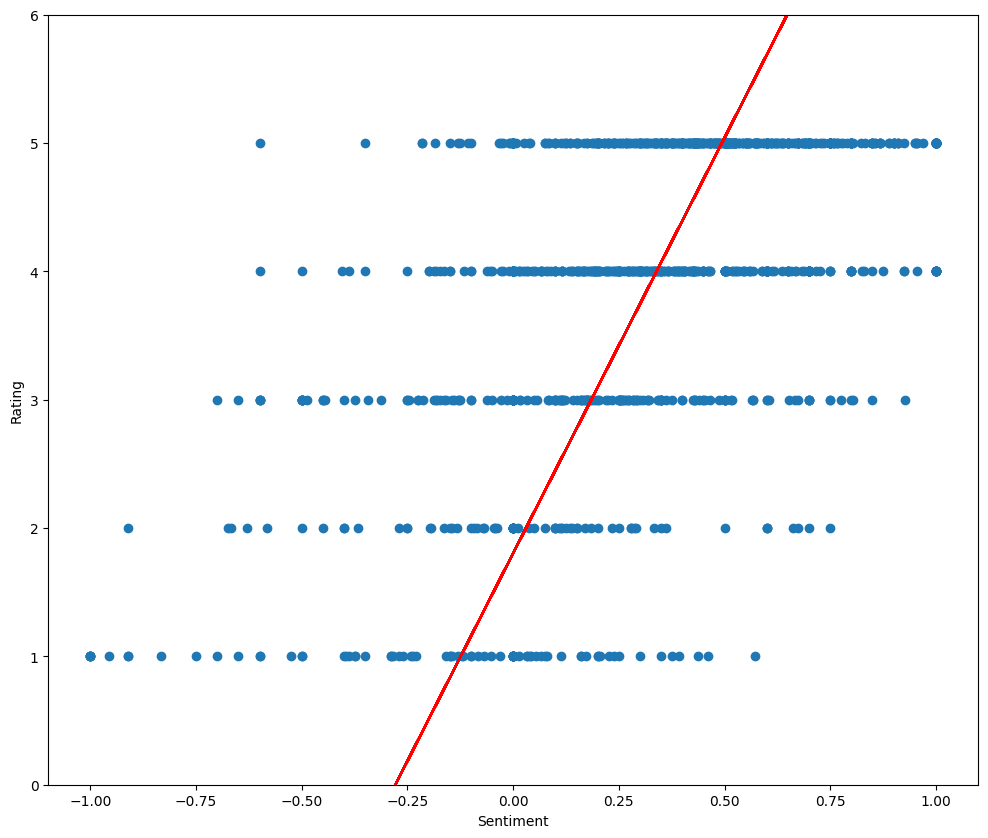

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10))

X=df['sentiment'].astype(float)
Y=df['rating']
plt.scatter(X,Y)

plt.ylim(0,6)
plt.plot(X, m*X + b, color='red', label=f'Linear Fit: y = {m:.2f}x + {b:.2f}')

plt.xlabel('Sentiment')
plt.ylabel('Rating')


In [37]:
np.array(df[df['rating'] == 1]['sentiment'])

array([-0.375, -0.24166666666666667, -0.375, -0.2833333333333333, -1.0,
       -0.2371428571428571, -1.0, -0.13124999999999998, 0.0, 0.0, 0.16,
       -0.07000000000000003, 0.25, 0.19999999999999998,
       -0.11944444444444445, 0.16, 0.375, -0.15999999999999998,
       0.033333333333333326, 0.013888888888888886, 0.0, -1.0, -1.0,
       -0.05333333333333333, 0.08035714285714285, 0.2, 0.20625, -1.0,
       -0.28888888888888886, 0.2375, -0.39444444444444443, -0.525,
       -0.9099999999999998, -0.12178571428571427, 0.0,
       -0.09999999999999999, 0.041666666666666664, -0.6999999999999998,
       -0.08333333333333333, -0.3499999999999999, 0.05333333333333334,
       -0.9099999999999998, -0.23076923076923078, 0.11399999999999999,
       -0.2899999999999999, -0.6, 0.3, 0.06666666666666668, 0.0,
       0.038888888888888896, -0.75, 0.22666666666666666, -0.4, -0.26, 0.0,
       0.0, -0.5, 0.4375, -0.14583333333333334, 0.5714285714285714,
       0.45999999999999996, -0.65, 0.35, -0.1499999999

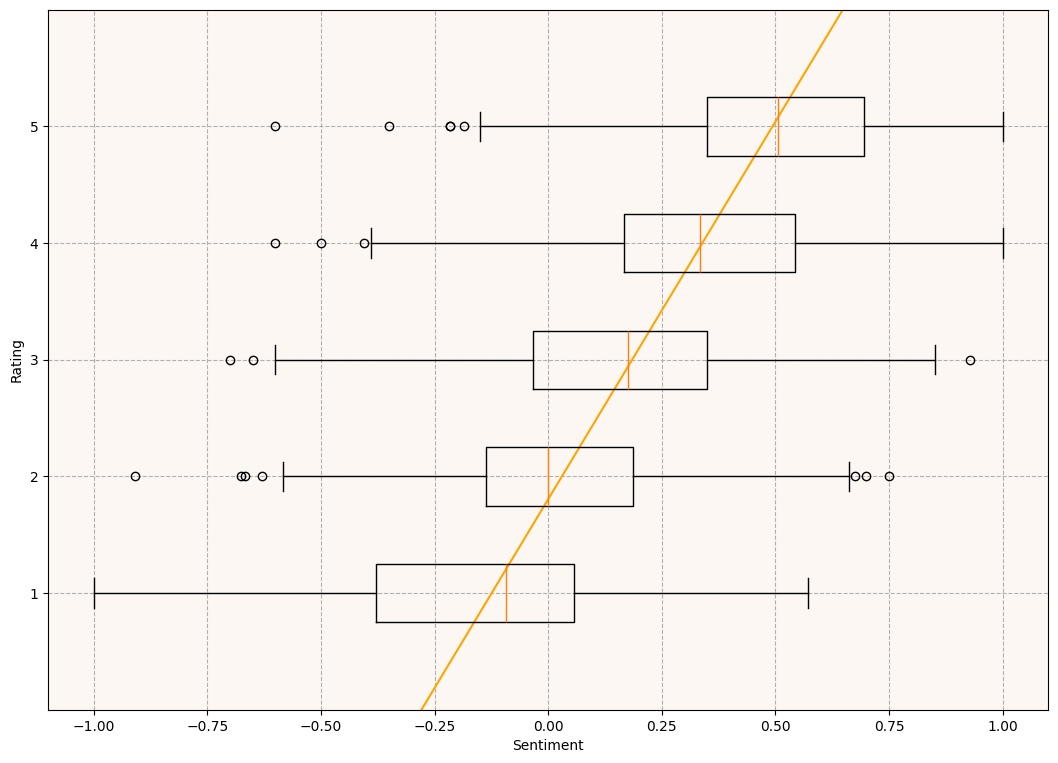

In [74]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.array(df[df['rating'] == 1]['sentiment'])
data_2 = np.array(df[df['rating'] == 2]['sentiment'])
data_3 = np.array(df[df['rating'] == 3]['sentiment'])
data_4 = np.array(df[df['rating'] == 4]['sentiment'])
data_5 = np.array(df[df['rating'] == 5]['sentiment'])

data = [data_1, data_2, data_3, data_4, data_5]

X = np.array([ np.median(data_1),  np.median(data_2),  np.median(data_3),  np.median(data_4),  np.median(data_5)])
Y = np.array([1,2,3,4,5])

m, b = np.polyfit(X, Y, 1)

 
fig = plt.figure(figsize =(10, 7))


ax = fig.add_axes([0, 0, 1, 1], facecolor= '#FDF7F4')
X = np.array([-1,1])


ax.plot(X, m*X + b, color='orange', label=f'Linear Fit: y = {m:.2f}x + {b:.2f}')
bp = ax.boxplot(data, vert = 0)


plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.grid(True, linestyle='--')
plt.sho

#plt.xlim()
plt.ylim(0,6)

# show plot
plt.show()

In [53]:
np.median(X)

0.14081323135843488

In [42]:
 data_1.mean()

-0.17477192460317453

In [77]:
df['text'][0]

"We went to Marmaris with my wife for a holiday. We chose this restaurant as a place for dinner based on the reviews and because we wanted juicy food. When we first went there was a serious queue. You proceed by taking the food you want in the form of an open buffet. Both vegetable dishes and meat dishes were plentiful. There was also dessert for those who wanted it. After you get what you want you pay at the cashier. They don't go through cards they work in cash. There was a lot of food variety. And the food prices were unbelievably cheap. We paid only 84 TL for all the meals here. It included buttermilk and bread. But unfortunately I can't say it's too clean as a place.."

In [80]:
from textblob import TextBlob
from collections import Counter

text = df['text'][0]

# Create a TextBlob object
blob = TextBlob(text)

# Initialize a Counter object to keep track of noun frequencies
noun_freq = Counter()

# Process each word and its part-of-speech tag
for word, pos in blob.tags:
    if pos.startswith('NN'):  # Check if the POS tag is for a noun
        noun_freq[word.lower()] += 1  # Increment the count for the noun in lowercase to ensure case-insensitivity

# Print the nouns and their frequencies
for noun, freq in noun_freq.items():
    print(f"Noun: {noun}, Frequency: {freq}")


Noun: marmaris, Frequency: 1
Noun: wife, Frequency: 1
Noun: holiday, Frequency: 1
Noun: restaurant, Frequency: 1
Noun: place, Frequency: 2
Noun: dinner, Frequency: 1
Noun: reviews, Frequency: 1
Noun: juicy, Frequency: 1
Noun: food, Frequency: 4
Noun: queue, Frequency: 1
Noun: form, Frequency: 1
Noun: buffet, Frequency: 1
Noun: dishes, Frequency: 2
Noun: meat, Frequency: 1
Noun: cashier, Frequency: 1
Noun: cards, Frequency: 1
Noun: cash, Frequency: 1
Noun: lot, Frequency: 1
Noun: variety, Frequency: 1
Noun: prices, Frequency: 1
Noun: tl, Frequency: 1
Noun: meals, Frequency: 1
Noun: buttermilk, Frequency: 1
Noun: bread, Frequency: 1
Noun: .., Frequency: 1


In [79]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sherryyang/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sherryyang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [81]:
import nltk
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('omw-1.4')

# Check if a noun is a type of food
def is_food(noun):
    food_synsets = wn.synset('food.n.02')
    noun_synsets = wn.synsets(noun, pos=wn.NOUN)

    for noun_synset in noun_synsets:
        if food_synsets in noun_synset.closure(lambda s:s.hypernyms()):
            return True
    return False

print(is_food('pizza'))  # Most likely returns True
print(is_food('rock'))   # Most likely returns False


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sherryyang/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sherryyang/nltk_data...


False
False


/Users/sherryyang/anaconda3/envs/cse481/lib/python3.10/site-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('entity.n.01') at depth 6
  for synset in acyclic_breadth_first(self, rel, depth):
/Users/sherryyang/anaconda3/envs/cse481/lib/python3.10/site-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('physical_entity.n.01') at depth 7
  for synset in acyclic_breadth_first(self, rel, depth):
/Users/sherryyang/anaconda3/envs/cse481/lib/python3.10/site-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('communication.n.02') at depth 5
  for synset in acyclic_breadth_first(self, rel, depth):


In [86]:
print(is_food('dishes'))

False


/Users/sherryyang/anaconda3/envs/cse481/lib/python3.10/site-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('artifact.n.01') at depth 5
  for synset in acyclic_breadth_first(self, rel, depth):
/Users/sherryyang/anaconda3/envs/cse481/lib/python3.10/site-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('physical_entity.n.01') at depth 8
  for synset in acyclic_breadth_first(self, rel, depth):
